In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler

In [21]:
cars = pd.read_csv('/Users/aleksanderlazowski/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/BA820-Fall-2021/datasets/cars.csv')

In [3]:
cars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
0,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc 240D
1,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc 230
2,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,Toyota Corona
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
4,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant


In [6]:
x = np.array([1,3])
y = np.array([3,4])
z = np.array([2,3])
a = np.stack([x,y,z])
a

array([[1, 3],
       [3, 4],
       [2, 3]])

In [7]:
a_df = pd.DataFrame(a)
a_df

,0,1
0,1,3
1,3,4
2,2,3


In [9]:
d1 = pdist(a)
d1

array([2.23606798, 1.        , 1.41421356])

In [10]:
squareform(d1)

array([[0.        , 2.23606798, 1.        ],
       [2.23606798, 0.        , 1.41421356],
       [1.        , 1.41421356, 0.        ]])

In [13]:
cd = pdist(a, metric="cosine")
squareform(cd)

array([[0.        , 0.0513167 , 0.03523618],
       [0.0513167 , 0.        , 0.00153965],
       [0.03523618, 0.00153965, 0.        ]])

In [14]:
pairwise_distances(a_df, metric="euclidean")

array([[0.        , 2.23606798, 1.        ],
       [2.23606798, 0.        , 1.41421356],
       [1.        , 1.41421356, 0.        ]])

Exercise - make model an index

In [20]:
cars.head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


In [23]:
cars.index = cars.model
cars.sample(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
model,,,,,,,,,,,,
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,Lincoln Continental
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Honda Civic
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,Fiat 128


In [24]:
cars.drop(columns='model', inplace=True)
cars.head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


In [25]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596562,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [30]:
#keep columns of interest
COLS = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']
cars2 = cars[COLS]
cars2.sample(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.25,17.98,0,0,3,4
Camaro Z28,13.3,8,350.0,245,3.73,3.84,15.41,0,0,3,4
Merc 450SL,17.3,8,275.8,180,3.07,3.73,17.60,0,0,3,3


In [31]:
#cars distance -- passing in the numpy array from the pandas fram via values
cdist = pdist(cars2.values)

<AxesSubplot:>

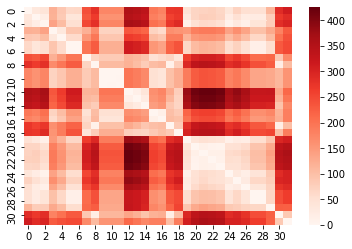

In [33]:
#squareform -- visualize get a sense thing
sns.heatmap(squareform(cdist), cmap='Reds')

In [36]:
#Our first cluster
hc1 = linkage(cdist)
type(hc1)

numpy.ndarray

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [102.5, 102.5, 130.0, 130.0],
  [80.0, 80.0, 116.25, 116.25],
  [145.0, 145.0, 155.0, 155.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [275.0, 275.0, 293.75, 293.75],
  [265.0, 265.0, 284.375, 284.375],
  [240.0, 240.0, 274.6875, 274.6875],
  [215.0, 215.0, 257.34375, 257.34375],
  [183.75, 183.75, 236.171875, 236.171875],
  [165.0, 165.0, 209.9609375, 209.9609375],
  [150.0, 150.0, 187.48046875, 187.48046875],
  [98.125, 98.125, 168.740234375, 168.740234375],
  [52.5, 52.5, 133.4326171875, 133.43261

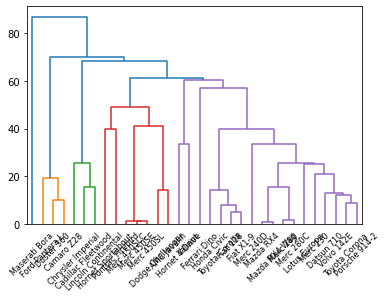

In [38]:
dendrogram(hc1, labels=cars.index)

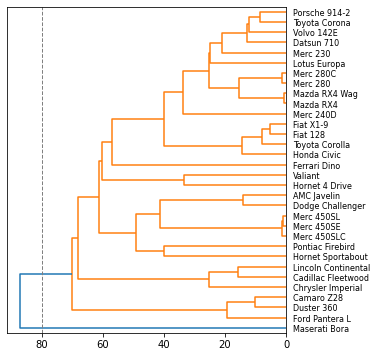

In [37]:
DIST = 80
plt.figure(figsize=(5,6))
dendrogram(hc1, 
            labels = cars.index,
            orientation = "left", 
            color_threshold = DIST)
plt.axvline(x=DIST, c='grey', lw=1, linestyle='dashed')
plt.show()

In [43]:
#how to identify clusters
fcluster(hc1, 2, criterion="maxclust")
cars2['cluster']= fcluster(hc1, 2, criterion="maxclust")

In [45]:
#profiling
cars2.cluster.value_counts()

1    31
2     1
Name: cluster, dtype: int64

In [48]:
#How about distance assignment
c2 = fcluster(hc1, 80, criterion="distance")

cars2['cluster2'] = c2
cars2.head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster,cluster2
model,,,,,,,,,,,,,
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,1,1


In [ ]:
#standardizing values - put values all on the same units